In [11]:
import pandas as pd
url = 'https://raw.githubusercontent.com/ohhappylife/ETLCFA/master/merged_news(keyword%3D\'elizabeth\').csv'
df = pd.read_csv(url,index_col=0)
df['Author'] = df['Author'].astype(str).str.lstrip()

In [12]:
information = df.groupby('camefrom')['camefrom'].count()

In [13]:
source = ['Bing', 'Google', 'NYT', 'News API', 'News Catcher','Politifact']

In [14]:
import numpy as np
information = information.to_frame().reset_index(drop = True)
information = information.join(df.groupby('camefrom')['Author'].nunique().to_frame().reset_index(drop = True))
information = information.join(df.groupby('camefrom')['Title_without_stopwords'].nunique().to_frame().reset_index(drop = True))
information['%_duplicated'] = (1 - (information.iloc[:, 2] /  information.iloc[:, 0])) * 100
df['length'] = df['Title_without_stopwords'].apply(len)
information = information.join(df.groupby('camefrom')['length'].agg([np.std, np.min, np.max, np.average]).reset_index(drop = True)
)

information.rename(columns={'Author': 'count_sources',
                            'camefrom': 'count_articles', 
                            'Title_without_stopwords' : 'count_unique_articles',
                            '%_duplicated' : '%_duplicated_articles',
                            'std' : 'std_article_count',
                            'amin' : 'min_article_count',
                            'amax' : 'max_article_count',
                            'average' : 'average_article_count'
                             }, inplace=True)

In [18]:
text = df.groupby('camefrom')['camefrom'].count()
text = text.to_frame().reset_index(drop = True)
text = text.join(df.groupby('camefrom')['Text_without_stopwords'].nunique().to_frame().reset_index(drop = True))
text['%_duplicated'] = (1- (text.iloc[:, 1] /  text.iloc[:, 0])) * 100
df['length'] = df['Text_without_stopwords'].apply(len)
text = text.join(df.groupby('camefrom')['length'].agg([np.std, np.min, np.max, np.average]).reset_index(drop = True)
)

text.rename(columns={'Author': 'count_sources',
                     'camefrom': 'count_texts', 
                     'Text_without_stopwords' : 'count_unique_texts',
                     '%_duplicated' : '%_duplicated_texts',
                     'std' : 'std_texts_count',
                     'amin' : 'min_texts_count',
                     'amax' : 'max_texts_count',
                     'average' : 'average_texts_count'
                     }, inplace=True)

In [19]:
df2 = df.drop_duplicates(subset = 'Text_without_stopwords')
df2 = df2.drop_duplicates(subset = 'Title_without_stopwords')
g = df2.groupby('Author')['Author'].count().sort_values(ascending = False).head(15)

In [20]:
g = pd.DataFrame(g)
g = g.rename(columns={'Author' : 'count'}).reset_index()

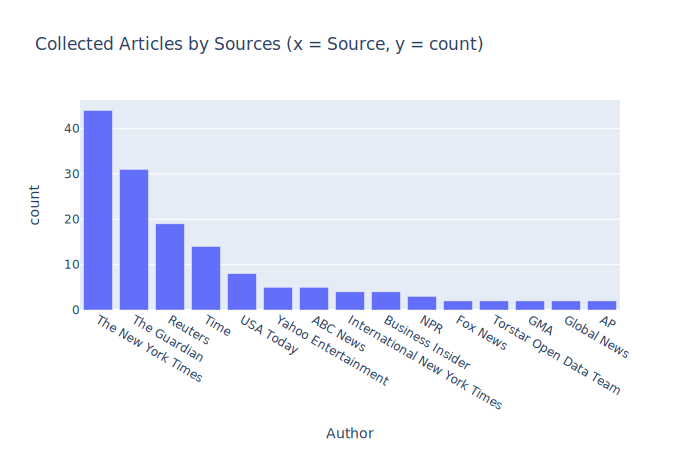

In [42]:
import plotly.express as px
import plotly.io as pio

fig = px.bar(g, x = "Author", 
             y = "count",
             title = "Collected Articles by Sources (x = Source, y = count)")
fig.show(renderer="svg")

In [33]:
df.groupby(['camefrom', 'Author'])['Author'].count().sort_values(ascending = False).head(50)

camefrom     Author                      
NYTimes      The New York Times              43
newsAPI      The Guardian                    31
             Reuters                         18
             Time                            13
             USA Today                        7
             ABC News                         5
politifact   Facebook posts                   5
newsAPI      Yahoo Entertainment              5
NYTimes      International New York Times     4
politifact   Instagram posts                  4
newsAPI      Business Insider                 4
politifact   Viral image                      3
newsCatcher  nan                              3
newsAPI      Global News                      2
             GMA                              2
             HuffPost                         2
newsCatcher  Torstar Open Data Team           2
             Stephanie Nolasco                2
newsAPI      NPR                              2
             BuzzFeed News                    

In [22]:
merged = information.join(text)

In [23]:
merged['index'] =  ['Bing', 'Google', 'NYT', 'News API', 'News Catcher', 'Politifact']
merged.set_index('index')

,count_articles,count_sources,count_unique_articles,%_duplicated_articles,std_article_count,min_article_count,max_article_count,average_article_count,count_texts,count_unique_texts,%_duplicated_texts,std_texts_count,min_texts_count,max_texts_count,average_texts_count
index,,,,,,,,,,,,,,,
Bing,10,8,10,0.0,22.238355,39,104,69.100000,10,10,0.000000,26.880187,112,188,149.100000
Google,7,7,7,0.0,19.082528,23,84,60.857143,7,7,0.000000,13.021959,85,124,109.285714
NYT,50,4,50,0.0,14.504946,20,77,49.120000,50,50,0.000000,30.328736,50,166,107.620000
News API,100,19,100,0.0,16.556225,26,123,63.550000,100,99,1.000000,13.263316,136,208,174.940000
News Catcher,50,46,14,72.0,10.169502,49,90,57.360000,50,34,32.000000,151.248648,384,813,719.360000
Politifact,30,21,30,0.0,36.455626,35,211,80.233333,30,1,96.666667,0.000000,11,11,11.000000


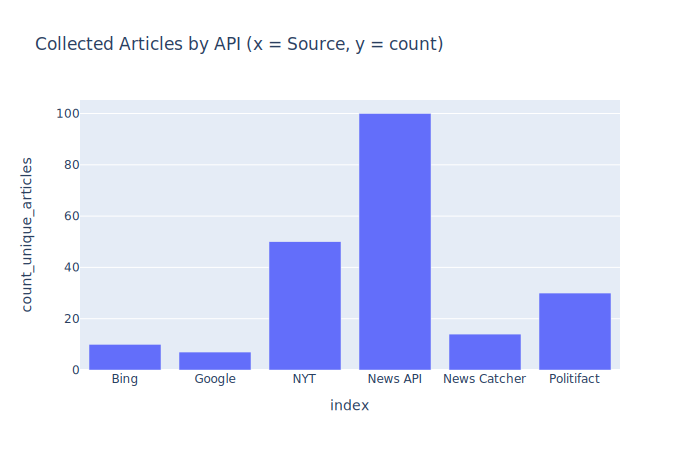

In [43]:
import plotly.express as px
  
fig = px.bar(merged, x = "index", 
             y = "count_unique_articles",
             title = "Collected Articles by API (x = Source, y = count)")
fig.show(renderer="svg")

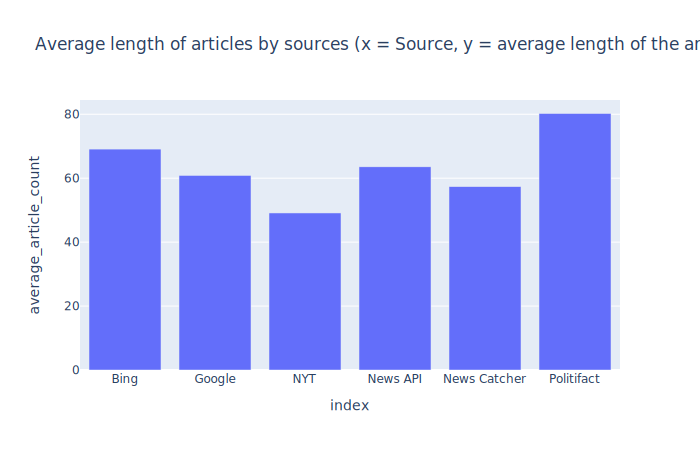

In [44]:
import plotly.express as px
  
fig = px.bar(merged, x = "index", 
             y = "average_article_count",
             title = "Average length of articles by sources (x = Source, y = average length of the article)")
fig.show(renderer="svg")